# About Dataset

**Context**
For recognising handwritten forms, the very first step was to gather data in a considerable amount for training. Which I struggled to collect for weeks.

**Content**
The dataset contains 26 folders (A-Z) containing handwritten images in size 2828 pixels, each alphabet in the image is centre fitted to 2020 pixel box.

Each image is stored as Gray-level

Kernel CSVToImages contains script to convert .CSV file to actual images in .png format in structured folder.

Note: Might contain some noisy image as well

**Acknowledgements**
The images are taken from NIST(https://www.nist.gov/srd/nist-special-database-19) and NMIST large dataset and few other sources which were then formatted as mentioned above.

**Inspiration**
The dataset would serve beginners in machine learning for there created a predictive model to recognise handwritten characters.

# Importing libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

# Data Exploring 

In [36]:
df = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')


In [37]:
df.shape

(372450, 785)

In [38]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data preprocessing

In [40]:
# getting target variable
y = df['0']
del df['0']

**Dealing with imbalanced target**

In [41]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

<AxesSubplot:xlabel='0', ylabel='count'>

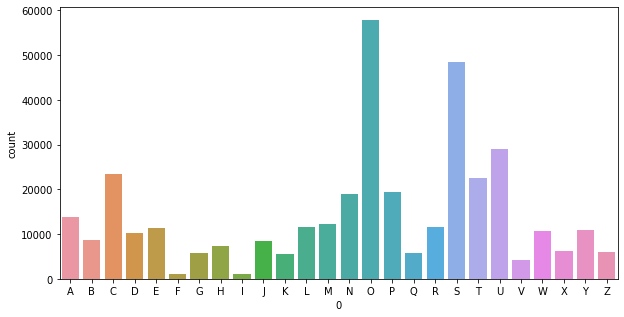

In [42]:
# Looking for imbalances in data
plt.figure(figsize = (10,5))
sns.countplot(x)

In [43]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

<AxesSubplot:xlabel='0', ylabel='count'>

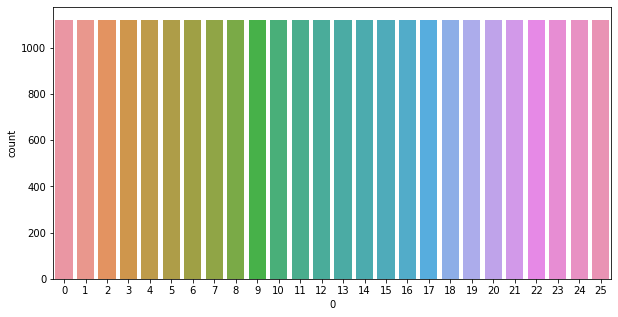

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)

**Encoding**

In [45]:
#One-Hot-Encoding of the target.
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

26

In [46]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [47]:
y.shape , X_data.shape

((29120, 26), (29120, 784))

**Normalization**

In [48]:
X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualization**

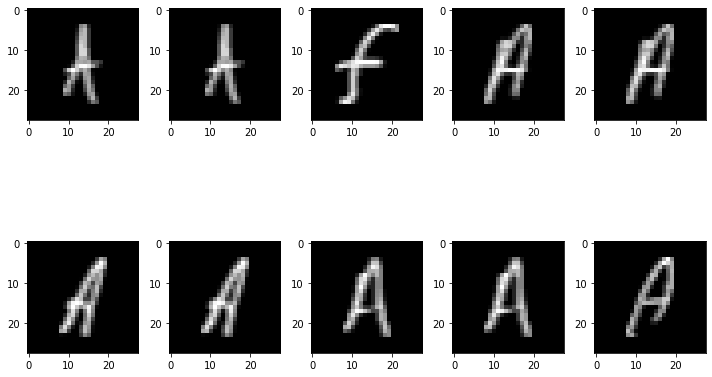

In [49]:
X_data = np.array(X_data)
X_data = X_data.reshape(-1,28,28,1)
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

**Train test split**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2 ,random_state=102)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23296, 28, 28, 1), (5824, 28, 28, 1), (23296, 26), (5824, 26))

# Model 1

In [52]:
#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
history = model.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
182/182 [==============================] - 4s 19ms/step - loss: 0.4290 - accuracy: 0.8811 - val_loss: 0.1667 - val_accuracy: 0.9490
Epoch 2/15
182/182 [==============================] - 3s 18ms/step - loss: 0.1137 - accuracy: 0.9663 - val_loss: 0.1061 - val_accuracy: 0.9700
Epoch 3/15
182/182 [==============================] - 4s 24ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.1010 - val_accuracy: 0.9777
Epoch 4/15
182/182 [==============================] - 4s 20ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.1184 - val_accuracy: 0.9727
Epoch 5/15
182/182 [==============================] - 3s 18ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.1074 - val_accuracy: 0.9811
Epoch 6/15
182/182 [==============================] - 3s 18ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.1537 - val_accuracy: 0.9675
Epoch 7/15
182/182 [==============================] - 3s 18ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.1404 - val_accuracy: 0.9742

In [54]:
# Final evaluation of the model
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 2.09%


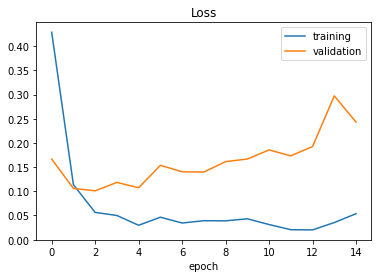

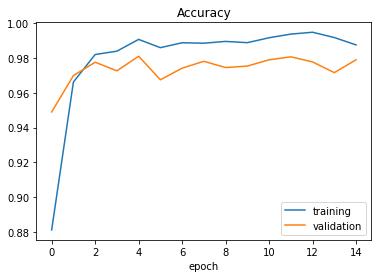

In [55]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

# Model 2 

In [56]:
model2 = Sequential()

model2.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', padding="same"))
model2.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu',padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 128)        

In [57]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=256, verbose=2)

Epoch 1/15
91/91 - 161s - loss: 0.7773 - accuracy: 0.7757 - val_loss: 0.2269 - val_accuracy: 0.9360
Epoch 2/15
91/91 - 160s - loss: 0.1657 - accuracy: 0.9537 - val_loss: 0.1248 - val_accuracy: 0.9650
Epoch 3/15
91/91 - 160s - loss: 0.1102 - accuracy: 0.9688 - val_loss: 0.1219 - val_accuracy: 0.9675
Epoch 4/15
91/91 - 162s - loss: 0.0713 - accuracy: 0.9797 - val_loss: 0.0810 - val_accuracy: 0.9799
Epoch 5/15
91/91 - 159s - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0767 - val_accuracy: 0.9816
Epoch 6/15
91/91 - 159s - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0710 - val_accuracy: 0.9813
Epoch 7/15
91/91 - 159s - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0657 - val_accuracy: 0.9833
Epoch 8/15
91/91 - 160s - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0686 - val_accuracy: 0.9854
Epoch 9/15
91/91 - 159s - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0666 - val_accuracy: 0.9866
Epoch 10/15
91/91 - 159s - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0621 - val_accuracy: 0.9861

In [58]:
# Final evaluation of the model
scores = model2.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.37%


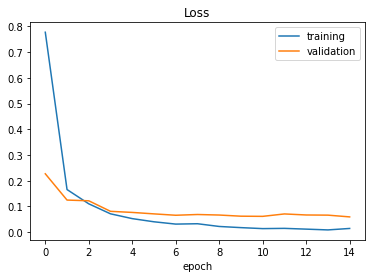

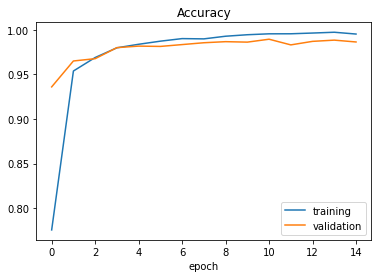

In [59]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()